In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
#url = 'Resources/fma_3secs.csv'
orignial_df = pd.read_csv(Path('Resources/model_data_3sec.csv'))
orignial_df

,Unnamed: 0,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
2,3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
3,4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
4,5,6-000574.mp3,0.392290,0.079841,0.271375,0.001388,2767.550410,159341.482509,2663.721676,52306.024210,...,30.794027,-8.423706,22.058167,-0.152457,19.684511,-4.535352,17.765066,2.383680,14.638711,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,79935,6-155066.mp3,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
71942,79936,7-155066.mp3,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
71943,79937,8-155066.mp3,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
71944,79938,9-155066.mp3,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [3]:
orignial_df_subset = orignial_df[(orignial_df.label == 'Instrumental') | (orignial_df.label == 'International')]
orignial_df_subset

,Unnamed: 0,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
90,100,1-000708.mp3,0.531248,0.074645,0.292974,0.007625,2090.083849,499211.456531,2518.433555,206750.973624,...,37.072041,-3.047591,32.607235,-2.242013,51.260616,-4.198438,75.536995,2.555559,49.571270,International
91,101,2-000708.mp3,0.504365,0.077693,0.276038,0.008052,2250.326545,474260.743443,2521.281054,168108.461035,...,22.968208,-2.548331,38.868893,-1.830567,49.659405,-4.832151,77.530060,3.521929,45.061771,International
92,102,3-000708.mp3,0.424711,0.099192,0.283082,0.004592,2657.213514,354671.590784,2841.673253,72332.435090,...,36.375851,-4.426717,56.786915,-0.022147,49.147640,-7.561225,40.356735,2.190212,40.491592,International
93,103,4-000708.mp3,0.416914,0.098893,0.276488,0.004804,2050.188107,208289.909581,2553.629972,121066.419007,...,44.181408,-0.751172,37.319473,-2.165192,26.467796,-5.714239,64.381660,3.331830,56.441319,International
94,104,5-000708.mp3,0.428968,0.096262,0.273277,0.005582,2198.062732,359462.361407,2621.388032,159997.931100,...,66.485931,-1.664813,36.328548,-2.933496,41.377449,-6.765586,52.765003,3.944376,53.365833,International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71797,79762,3-152254.mp3,0.291738,0.084889,0.099821,0.001489,2328.704132,213420.931511,2254.846117,95111.412098,...,35.507725,-8.256199,66.544586,-1.507564,40.698814,-8.657179,44.666759,-7.438839,25.267702,International
71798,79763,4-152254.mp3,0.287538,0.079038,0.066213,0.002893,2347.753127,56838.465133,2214.352469,26933.528086,...,52.340729,-5.755661,47.957100,-0.354954,29.414448,-6.584225,21.527937,-9.034927,17.191420,International
71799,79764,5-152254.mp3,0.281282,0.092910,0.131056,0.001874,1743.253163,54971.467436,1909.913876,63500.604646,...,41.318150,-6.481230,32.743641,-1.985211,21.502527,-13.788243,30.762741,-11.174603,105.837616,International
71800,79765,6-152254.mp3,0.391574,0.092223,0.245938,0.002598,1509.448831,98213.194949,1835.237750,53747.465591,...,66.476509,4.466017,32.845093,5.784225,36.219242,-1.927512,58.793030,3.664120,46.179516,International


In [4]:
#drop label and filename columns
X = orignial_df_subset.drop(['label','filename'], axis=1)
# get label values 
y = orignial_df_subset['label']
y.unique()

array(['International', 'Instrumental'], dtype=object)

### Code with VAR features

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


rf_model = RandomForestClassifier(random_state=1, n_estimators=200).fit(X_train_scaled, y_train)
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')

### Code without Var features - scaled data

In [5]:
X = X[X.columns.drop(list(X.filter(regex='var')))]
X

,Unnamed: 0,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
90,100,0.531248,0.292974,2090.083849,2518.433555,4827.578501,0.093799,-0.000038,-0.000559,129.199219,...,0.404335,9.482736,1.577892,7.697780,-0.020824,2.994560,-3.047591,-2.242013,-4.198438,2.555559
91,101,0.504365,0.276038,2250.326545,2521.281054,5067.673715,0.104304,-0.000080,0.000008,129.199219,...,-3.833241,7.788484,-0.179002,4.323314,-2.003319,3.706306,-2.548331,-1.830567,-4.832151,3.521929
92,102,0.424711,0.283082,2657.213514,2841.673253,6111.951247,0.085284,0.000095,-0.000525,123.046875,...,-5.092156,6.028035,1.390081,2.135429,-4.834723,3.247042,-4.426717,-0.022147,-7.561225,2.190212
93,103,0.416914,0.276488,2050.188107,2553.629972,4877.850248,0.070726,0.000089,-0.000411,129.199219,...,-5.693818,7.780324,-2.244363,1.710539,-3.142427,2.765442,-0.751172,-2.165192,-5.714239,3.331830
94,104,0.428968,0.273277,2198.062732,2621.388032,5238.200120,0.078238,-0.000097,-0.000436,172.265625,...,-6.203454,6.508696,-1.389135,3.778795,-3.324232,0.322612,-1.664813,-2.933496,-6.765586,3.944376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71797,79762,0.291738,0.099821,2328.704132,2254.846117,4679.496319,0.116012,-0.000014,-0.000049,117.453835,...,-9.426128,-2.566720,-14.630150,-7.920785,-13.906534,-5.776963,-8.256199,-1.507564,-8.657179,-7.438839
71798,79763,0.287538,0.066213,2347.753127,2214.352469,4553.692721,0.122773,-0.000003,-0.000006,143.554688,...,-11.547308,-7.731795,-17.918152,-11.604579,-14.181043,-3.437056,-5.755661,-0.354954,-6.584225,-9.034927
71799,79764,0.281282,0.131056,1743.253163,1909.913876,2999.078275,0.090283,-0.000004,-0.000009,129.199219,...,-20.538645,-10.194404,-18.108135,-6.598543,-10.437100,-3.427228,-6.481230,-1.985211,-13.788243,-11.174603
71800,79765,0.391574,0.245938,1509.448831,1835.237750,2851.658654,0.052982,0.000270,-0.000204,143.554688,...,-3.023266,1.727669,-1.870252,5.379509,2.990116,4.158150,4.466017,5.784225,-1.927512,3.664120


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
# Create a StandardScaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:

rf_model = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9393468118195957


In [9]:
predictions = rf_model.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
29560,International,International
37675,Instrumental,Instrumental
50756,Instrumental,Instrumental
56095,Instrumental,Instrumental
38234,Instrumental,Instrumental
...,...,...
43918,Instrumental,Instrumental
46866,Instrumental,Instrumental
29947,International,International
22732,International,International


In [10]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 Instrumental       0.95      0.93      0.94      2256
International       0.93      0.95      0.94      2245

     accuracy                           0.94      4501
    macro avg       0.94      0.94      0.94      4501
 weighted avg       0.94      0.94      0.94      4501



### Removing low importance features

[0.22604752 0.01832695 0.02508379 0.0758442  0.07976359 0.08231579
 0.03305496 0.02109752 0.02023487 0.01349139 0.03885999 0.08797213
 0.02151031 0.02237964 0.01628002 0.01899246 0.01738194 0.01680712
 0.01562477 0.01936983 0.01338073 0.01380104 0.01389026 0.01586542
 0.0132255  0.01250464 0.0118453  0.0110134  0.01100355 0.01303139]


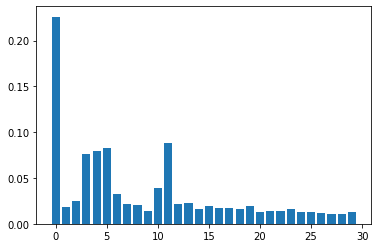

In [11]:
#shows features that contirbutes the most
features = rf_model.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [12]:
#select form features that contributes the most
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rf_model)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True, False, False,  True,  True,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [14]:
lr_model_sel = LogisticRegression()
lr_model_sel.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {lr_model_sel.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_model_sel.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8197304103095837
Testing Score: 0.8251499666740725


In [15]:
rf_model_sel = RandomForestClassifier(random_state=1, n_estimators=10).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {rf_model_sel.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rf_model_sel.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9964449711153903
Testing Score: 0.9371250833148189


In [16]:
from joblib import dump, load
dump(rf_model, 'Model/RF_opt_Instr&Intl.joblib') 

['Model/RF_opt_Instr&Intl.joblib']